In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
import models
import models.logreg

In [3]:
%load_ext autoreload
%autoreload 1

In [51]:
def f(prefix):
    prefix = prefix + '/'
    data=torch.load(prefix+'data.pth.tar')

    X, Y, Xt, Yt, C = data

    X.shape

    num = X.shape[1]

    # sample = np.random.choice(num, 1000, replace=False)
    sample = np.arange(num)

    data=torch.load(prefix+'model.pth.tar')
    state_dict = data['model']
    fnorm = data['fnorm']
    weights = data['weights']
    alpha = data['alpha_normed']
    normg = data['normg']
    print(alpha.min(), alpha.max(), np.median(alpha), alpha.mean())

    C.shape

    model = models.logreg.Linear(C.shape[0], C.shape[1])
    model.load_state_dict(state_dict)

    x = np.linspace(X[0].min()-1, X[0].max()+1, 100)
    y = np.linspace(X[1].min()-1, X[1].max()+1, 100)
    px, py = np.meshgrid(x, y)
    p = np.vstack((px.flat, py.flat))

    Z = np.argmax(model(Variable(torch.Tensor(p.T))).data.numpy().copy(), axis=1)

    plt.rcParams.update({'font.size': 12})
    plt.contourf(x, y, Z.reshape(100, 100), int(Y.max())+1, cmap=plt.cm.tab20c)
    # plt.scatter(C[0, :], C[1, :], c='g', s=100, label='centers')
    for i in range(int(Y.max())+1):
        print(alpha[Y[sample]==i].max())
        s = np.maximum(1, alpha[Y[sample]==i]/alpha[Y[sample]==i].max()*100)
        plt.scatter(X[0, sample[Y[sample]==i]], X[1, sample[Y[sample]==i]], c=s, s=s, cmap='Reds', edgecolors='Black')
    # plt.axis('off')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    #plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.savefig(prefix+'fig.png', dpi=100, bbox_inches='tight')

(1.232497983576035e-290, 1.0, 2.1480000542749974e-149, 0.015625)
1.0
2.84019184304e-44
(6.1898282852650718e-06, 0.99804303745615131, 0.0010027396211925775, 0.015624999999999997)
0.998043037456
0.0116686698058
(9.730593395639229e-10, 0.47203075702035741, 0.00038668648237858317, 0.015625)
0.47203075702
0.000978339829828
(1.2563988657349374e-06, 0.8481504169271562, 0.0055871087188060524, 0.03125)
0.472159887919
0.848150416927
(3.6273044384587978e-10, 0.46984780967710832, 0.00034103055340532962, 0.015625)
0.469847809677
0.000825040731531
(7.4783834172488754e-07, 0.86798241344894089, 0.0047629667363992823, 0.03125)
0.469761733314
0.867982413449


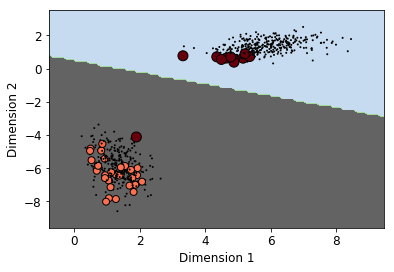

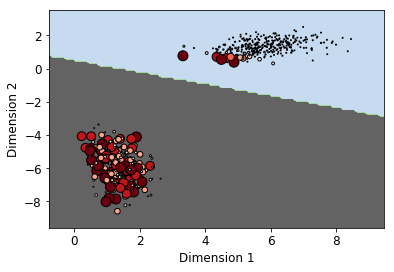

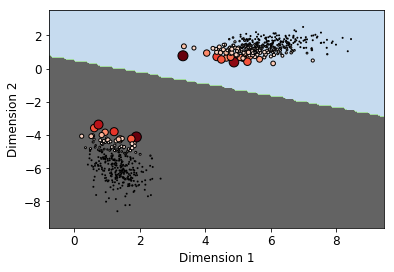

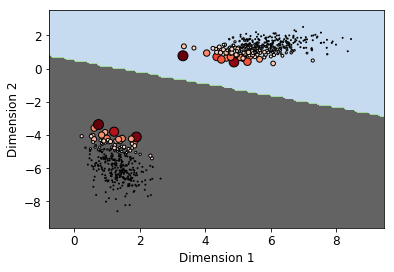

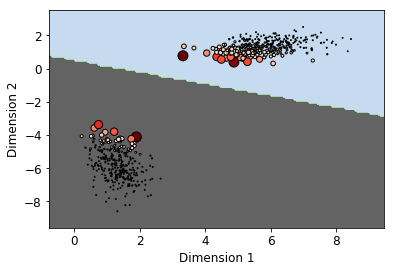

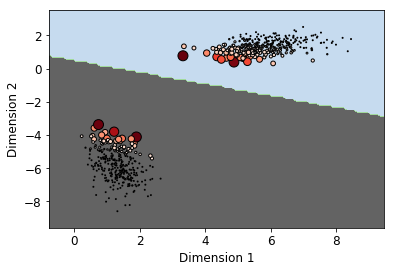

In [53]:
fnames = [
    '0_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_normg,alpha_norm_exp,norm_temp_0.0001',
    '1_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_exp,norm_temp_0.0001',
    '2_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_normg,alpha_norm_sum',
    '3_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_normg,alpha_norm_sum_class',
    '4_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_sum',
    '5_dataset_logreg,optim_dmom,lr_0.01,dmom_0.0,momentum_0.9,alpha_ggbar_abs,alpha_norm_sum_class'
]
for i in range(len(fnames)):
    plt.figure()
    f('../runs_logreg/'+fnames[i])

(1.4156168668796858e-10, 0.32810750650825304, 0.00029837657468658743, 0.015625)
0.328107506508
0.000413883730466


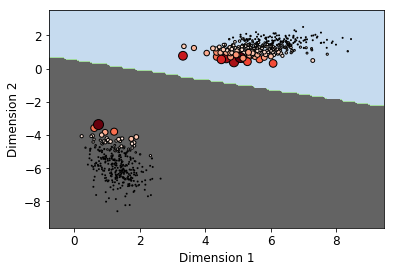

In [52]:
f('../runs/X')